In [ ]:
 import pandas as pd

df = pd.read_csv('hotel_bookings.csv')

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.drop(['agent', 'company', 'arrival_date_week_number'], axis=1, inplace=True)
df.children.fillna(value=0.0, inplace=True)
df.country.fillna(value='PRT', inplace=True)

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:
df[df.duplicated(keep=False)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,1,2,4,2,0.0,...,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,1,2,4,2,0.0,...,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,2,2,3,2,0.0,...,E,0,No Deposit,0,Transient,137.00,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,31,0,3,3,0.0,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,31,0,3,3,0.0,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,31,0,3,3,0.0,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119372,City Hotel,0,175,2017,August,31,1,3,1,0.0,...,A,0,No Deposit,0,Transient,82.35,0,1,Check-Out,2017-09-04


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(87351, 29)

<h2>Preprossesing</h2>

In [ ]:
numerical = [var for var in df.columns if df[var].dtypes!= 'object']
numerical

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
numerical = ['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'babies',
 'children'
]

In [ ]:
for j in numerical:
    IQR = df[j].quantile(0.75) - df[j].quantile(0.25)
    Lower_fence = df[j].quantile(0.25) - (IQR * 3)
    Upper_fence = df[j].quantile(0.75) + (IQR * 3)
    print(j + ' outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

lead_time outliers are values < -331.0 or > 467.0
stays_in_weekend_nights outliers are values < -6.0 or > 8.0
stays_in_week_nights outliers are values < -8.0 or > 13.0
adults outliers are values < 2.0 or > 2.0
previous_cancellations outliers are values < 0.0 or > 0.0
previous_bookings_not_canceled outliers are values < 0.0 or > 0.0
booking_changes outliers are values < 0.0 or > 0.0
days_in_waiting_list outliers are values < 0.0 or > 0.0
adr outliers are values < -114.0 or > 320.0
required_car_parking_spaces outliers are values < 0.0 or > 0.0
total_of_special_requests outliers are values < -3.0 or > 4.0
babies outliers are values < 0.0 or > 0.0
children outliers are values < 0.0 or > 0.0


In [ ]:
for k in numerical:
    print("the min and max values of " + k + " are {} and {}".format(df[k].min(), df[k].max()))

the min and max values of lead_time are 0 and 737
the min and max values of stays_in_weekend_nights are 0 and 19
the min and max values of stays_in_week_nights are 0 and 50
the min and max values of adults are 0 and 55
the min and max values of previous_cancellations are 0 and 26
the min and max values of previous_bookings_not_canceled are 0 and 72
the min and max values of booking_changes are 0 and 21
the min and max values of days_in_waiting_list are 0 and 391
the min and max values of adr are -6.38 and 5400.0
the min and max values of required_car_parking_spaces are 0 and 8
the min and max values of total_of_special_requests are 0 and 5
the min and max values of babies are 0 and 10
the min and max values of children are 0.0 and 10.0


In [ ]:
import numpy as np

def max_value(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])
df['lead_time'] = max_value(df,'lead_time',737)
df['stays_in_weekend_nights'] = max_value(df,'stays_in_weekend_nights',19)
df['stays_in_week_nights'] = max_value(df,'stays_in_week_nights',50)
df['adults'] = max_value(df,'adults',55)
df['previous_cancellations'] = max_value(df,'previous_cancellations',26)
df['previous_bookings_not_canceled'] = max_value(df,'previous_bookings_not_canceled',72)
df['booking_changes'] = max_value(df,'booking_changes',21)
df['days_in_waiting_list'] = max_value(df,'days_in_waiting_list',391)
df['adr'] = max_value(df,'adr',5400.0)
df['required_car_parking_spaces'] = max_value(df,'required_car_parking_spaces',8)
df['total_of_special_requests'] = max_value(df,'total_of_special_requests',5)
df['babies'] = max_value(df,'babies',10)
df['children'] = max_value(df,'children',10.0)

In [ ]:
categorical = [var for var in df.columns if df[var].dtypes == 'object']
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [ ]:
df['is_canceled'] = df['is_canceled'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')

In [ ]:
categorical = ['is_canceled',
 'hotel',
 'meal',
 'country',
 'is_repeated_guest',
 'market_segment',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [ ]:
for i in categorical:
    bookings = pd.concat([df, pd.get_dummies(df[i], drop_first=True)], axis=1)

In [ ]:
X = df.drop(['is_canceled', 'hotel', 'meal', 'is_repeated_guest', 'market_segment', 'reserved_room_type',
                   'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status','arrival_date_month', 'country',
                  'distribution_channel','reservation_status_date','arrival_date_day_of_month'], axis=1)
y = df.is_canceled

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<h2>Multicollinearity Check</h2>

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_df = pd.DataFrame(X_train, columns = X.columns)

vif = pd.DataFrame()
vif["Feature"] = X_train_df.columns
vif["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

print(vif)

                           Feature       VIF
0                        lead_time  1.196476
1                arrival_date_year  1.069807
2          stays_in_weekend_nights  1.469007
3             stays_in_week_nights  1.539210
4                           adults  1.110008
5                         children  1.122548
6                           babies  1.018781
7           previous_cancellations  1.227099
8   previous_bookings_not_canceled  1.253772
9                  booking_changes  1.026191
10            days_in_waiting_list  1.028442
11                             adr  1.242359
12     required_car_parking_spaces  1.020114
13       total_of_special_requests  1.044663


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train, test_size=0.2, random_state=42)

<h1>Models</h1>

<h2>Logistic Regression</h2>

<h4>Model Training</h4>

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(class_weight='balanced', max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

<h4>Model Evaluation</h4>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy score  : ", accuracy_score(y_test, y_pred))
print("Precision : ", precision_score(y_test, y_pred, pos_label='0'))
print("Recall score : ", recall_score(y_test, y_pred, pos_label='0'))
print('F1:', f1_score(y_test, y_pred, pos_label='0'))
print('Confusion Metrix:', confusion_matrix(y_test, y_pred))

Accuracy score  :  0.6585575271894677
Precision :  0.8546634870164282
Recall score :  0.6370728816906972
F1: 0.7299988683942514
Confusion Metrix: [[6451 3675]
 [1097 2753]]


<h4>Hyperparameter Tuning</h4>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist_lr = [
    {
        'solver': ['newton-cg', 'lbfgs', 'sag'],
        'penalty': ['l2'],
        'C': uniform(0.001, 10),
        'max_iter': randint(100, 500)
    },
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': uniform(0.001, 10),
        'max_iter': randint(100, 500)
    },
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'C': uniform(0.001, 10),
        'max_iter': randint(100, 500),
        'l1_ratio': uniform(0, 1)
    }
]


random_search_lr = RandomizedSearchCV(estimator=LogisticRegression(random_state=42),
                                      param_distributions=param_dist_lr,
                                      n_iter=100, cv=5, n_jobs=-1, scoring='accuracy',
                                      verbose=2, random_state=42, error_score='raise')

random_search_lr.fit(X_train, y_train)

best_params_lr = random_search_lr.best_params_
print("Best hyperparameters for Logistic Regression:", best_params_lr)

best_model_lr = random_search_lr.best_estimator_
accuracy_best_model_lr = best_model_lr.score(X_test, y_test)
print("Accuracy of the best Logistic Regression model:", accuracy_best_model_lr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters for Logistic Regression: {'C': 0.9727649377076854, 'max_iter': 387, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy of the best Logistic Regression model: 0.7510017172295363


<h4>Model Re-Training</h4>

In [ ]:
best_params_lr = {
    'C': 0.9727649377076854,
    'max_iter': 387,
    'penalty': 'l1',
    'solver': 'liblinear'
}

final_model_lr = LogisticRegression(**best_params_lr)
final_model_lr.fit(X_train, y_train)

y_pred_lr = final_model_lr.predict(X_test)

<h4>New Model Evaluation</h4>

In [ ]:
accuracy_lr1 = accuracy_score(y_test, y_pred_lr)
precision_lr1 = precision_score(y_test, y_pred_lr, pos_label='0')
recall_lr1 = recall_score(y_test, y_pred_lr, pos_label='0')
f1_lr1 = f1_score(y_test, y_pred_lr, pos_label='0')

print("Logistic Regression Performance:")
print(f'Accuracy: {accuracy_lr1}')
print(f'Precision: {precision_lr1}')
print(f'Recall: {recall_lr1}')
print(f'F1-score: {f1_lr1}')

Logistic Regression Performance:
Accuracy: 0.7510017172295363
Precision: 0.7623973468098547
Recall: 0.9534860754493384
F1-score: 0.8473014480035103


<h4>Feature Importance</h4>

In [ ]:
#coefficients = model_lr.coef_[0]
#importance = np.abs(coefficients)
#feature_importance_lr = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
#feature_importance_lr = feature_importance_lr.sort_values(by='Importance', ascending=False)
#
#print(feature_importance_lr.head(10))

<h4>Feature Selection</h4>

In [ ]:
#from sklearn.feature_selection import RFE
#
#selector = RFE(estimator=model_lr, n_features_to_select=None, step=1)
#X_train_selected = selector.fit_transform(X_train, y_train)
#model_lr.fit(X_train_selected, y_train)
#
#print("Number of selected features:", selector.n_features_)
#print("Selected Features:")
#for i, feature in enumerate(X.columns):
#    print(feature, "-", selector.support_[i])

<h4>SHAP</h4>

In [ ]:
#import shap
#import matplotlib.pyplot as plt
#import pandas as pd
#
#X_test_selected = selector.transform(X_test)
#selected_feature_names = X.columns[selector.support_]
#
#explainer = shap.Explainer(model_lr, X_train_selected)
#shap_values = explainer.shap_values(X_test_selected)
#shap_values_df = pd.DataFrame(shap_values, columns=selected_feature_names)
#
#shap.summary_plot(shap_values, X_test_selected, feature_names=selected_feature_names)
#
#print("\nSHAP values:")
#for i, feature_name in enumerate(selected_feature_names):
#    print(f"{feature_name}: {shap_values[:, i]}")

In [ ]:
import shap

explainer = shap.Explainer(model_lr, X_train)
shap_values = explainer.shap_values(X_test)

mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

shap_importance_df = pd.DataFrame({'Feature': X.columns, 'Mean Absolute SHAP Importance': mean_abs_shap_values})
shap_importance_df = shap_importance_df.sort_values(by='Mean Absolute SHAP Importance', ascending=False)

print(shap_importance_df.head(10))

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


                           Feature  Mean Absolute SHAP Importance
12     required_car_parking_spaces                       3.209425
13       total_of_special_requests                       0.317503
0                        lead_time                       0.298559
11                             adr                       0.249603
8   previous_bookings_not_canceled                       0.183456
9                  booking_changes                       0.169467
1                arrival_date_year                       0.132781
7           previous_cancellations                       0.082155
3             stays_in_week_nights                       0.054225
4                           adults                       0.043706


<h4>LIME</h4>

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

feature_names = X_train.columns.tolist()
X_train.columns = feature_names
X_test.columns = feature_names

explainer_lime = LimeTabularExplainer(
    X_train.values,
    feature_names=feature_names,
    class_names=['Not Cancelled', 'Cancelled'],
    discretize_continuous=True,
    random_state=42
)

def lr_predict_proba(X):
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=feature_names)
    return model_lr.predict_proba(X)

exp = explainer_lime.explain_instance(X_test.values[0], lr_predict_proba, num_features=10)
exp_list = exp.as_list()

lime_features = [f.split(' ')[0] for f, _ in exp_list]
lime_coefficients = [c for _, c in exp_list]

filtered_features = [f for f in lime_features if f in feature_names]
filtered_coefficients = [lime_coefficients[i] for i, f in enumerate(lime_features) if f in feature_names]

lime_importance_df = pd.DataFrame({'Feature': filtered_features})
lime_importance_df['Mean Absolute LIME Coefficient'] = np.abs(filtered_coefficients)

while len(lime_importance_df) < 10:
    lime_importance_df = pd.concat([lime_importance_df, pd.DataFrame({'Feature': [np.nan], 'Mean Absolute LIME Coefficient': [np.nan]})], ignore_index=True)

print(lime_importance_df.head(10))

                          Feature  Mean Absolute LIME Coefficient
0          previous_cancellations                        0.545081
1     required_car_parking_spaces                        0.178221
2  previous_bookings_not_canceled                        0.141503
3                       lead_time                        0.058184
4                 booking_changes                        0.054305
5                          adults                        0.031658
6                        children                        0.022785
7            days_in_waiting_list                        0.020448
8                             NaN                             NaN
9                             NaN                             NaN


In [ ]:
#from lime import lime_tabular
#
#explainer_subset = lime_tabular.LimeTabularExplainer(X_test_selected, feature_names=selected_feature_names, mode="classification")
#exp_subset = explainer_subset.explain_instance(X_test_selected[0], model_lr.predict_proba, num_features=10)
#
#exp_subset.show_in_notebook()

In [ ]:
#from lime import lime_tabular
#
#explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, mode="classification")
#exp = explainer.explain_instance(X_test.values[0], model_lr.predict_proba, num_features=10)
#
#exp.show_in_notebook()
#

<h4>Permutation Importance</h4>

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd

perm_importance = permutation_importance(model_lr, X_test, y_test)
feature_names = X.columns

perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

print(perm_importance_df.head(10))

                           Feature  Importance
13       total_of_special_requests    0.031754
12     required_car_parking_spaces    0.021580
0                        lead_time    0.021308
11                             adr    0.020306
9                  booking_changes    0.011348
7           previous_cancellations    0.010976
1                arrival_date_year    0.006826
3             stays_in_week_nights    0.001660
8   previous_bookings_not_canceled    0.001073
5                         children    0.000873


In [ ]:
#from sklearn.inspection import permutation_importance
#
#perm_importance = permutation_importance(model_lr, X_test_selected, y_test)
#feature_names = selected_feature_names
#
#perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})
#perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
#print(perm_importance_df.head(10))
#
#plt.figure(figsize=(10, 6))
#plt.barh(perm_importance_df['Feature'][:10], perm_importance_df['Importance'][:10])
#plt.xlabel('Permutation Importance')
#plt.ylabel('Feature')
#plt.title('Top 10 Permutation Importances')
#plt.gca().invert_yaxis()
#plt.show()
#

In [ ]:
#from sklearn.inspection import permutation_importance

#perm_importance = permutation_importance(model_lr, X_test, y_test)
#feature_names = X.columns
#
#perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})
#perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
#print(perm_importance_df.head(10))
#
#plt.figure(figsize=(10, 6))
#plt.barh(perm_importance_df['Feature'][:10], perm_importance_df['Importance'][:10])
#plt.xlabel('Permutation Importance')
#plt.ylabel('Feature')
#plt.title('Top 10 Permutation Importances')
#plt.gca().invert_yaxis()
#plt.show()
#

<h4>Jaccard Similarity</h4>

In [ ]:
import numpy as np

top_shap_features = set(shap_importance_df.head(10)['Feature'])
top_lime_features = set(lime_importance_df.head(10)['Feature'])
top_perm_features = set(perm_importance_df.head(10)['Feature'])

def jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union

jaccard_shap_lime = jaccard_similarity(top_shap_features, top_lime_features)
jaccard_shap_perm = jaccard_similarity(top_shap_features, top_perm_features)
jaccard_lime_perm = jaccard_similarity(top_lime_features, top_perm_features)

print("Jaccard Similarity between SHAP and LIME:", jaccard_shap_lime)
print("Jaccard Similarity between SHAP and Permutation Importance:", jaccard_shap_perm)
print("Jaccard Similarity between LIME and Permutation Importance:", jaccard_lime_perm)

Jaccard Similarity between SHAP and LIME: 0.46153846153846156
Jaccard Similarity between SHAP and Permutation Importance: 0.8181818181818182
Jaccard Similarity between LIME and Permutation Importance: 0.46153846153846156


In [ ]:
#top_shap_features_lr = shap_values_df.abs().mean().sort_values(ascending=False).index[:10]
#top_lime_features_lr = [f[0] for f in exp_subset.as_list()]
#top_permutation_features_lr = perm_importance_df['Feature'][:10]
#
#top_lime_features_formatted_lr = [feature.split(' ')[0] for feature in top_lime_features_lr]
#
#shap_set_lr = set(top_shap_features_lr)
#lime_set_lr = set(top_lime_features_formatted_lr)
#perm_set_lr = set(top_permutation_features_lr)
#
#shap_lime_lr = len(shap_set_lr.intersection(lime_set_lr)) / len(shap_set_lr.union(lime_set_lr))
#shap_perm_lr = len(shap_set_lr.intersection(perm_set_lr)) / len(shap_set_lr.union(perm_set_lr))
#lime_perm_lr = len(lime_set_lr.intersection(perm_set_lr)) / len(lime_set_lr.union(perm_set_lr))
#
#print("SHAP:")
#print(top_shap_features_lr)
#print("\nLIME:")
#print(top_lime_features_formatted_lr)
#print("\nPermutation Importance:")
#print(top_permutation_features_lr)

In [ ]:
#top_shap_features_lr = ['required_car_parking_spaces', 'lead_time', 'total_of_special_requests',
#                        'adr', 'previous_bookings_not_canceled', 'booking_changes',
#                        'previous_cancellations']
#
#top_lime_features_lr = ['previous_cancellations <= -0.08', 'required_car_parking_spaces <= -0.30',
#                        'previous_bookings_not_canceled <= -0.11', 'booking_changes <= -0.37',
#                        'lead_time <= -0.80', '-0.31 < arrival_date_year <= 1.15',
#                        'days_in_waiting_list <= -0.07', '-0.62 < adr <= -0.15',
#                        'children <= -0.30', 'adults <= 0.19']
#
#top_permutation_features_lr = ['total_of_special_requests', 'lead_time', 'required_car_parking_spaces',
#                               'adr', 'booking_changes', 'previous_cancellations', 'arrival_date_year',
#                               'stays_in_week_nights', 'previous_bookings_not_canceled', 'children']
#
#shap_set_lr = set(top_shap_features_lr)
#lime_set_lr = set([feature.split(" ")[0] for feature in top_lime_features_lr])
#perm_set_lr = set(top_permutation_features_lr)
#
#shap_lime_lr = len(shap_set_lr.intersection(lime_set_lr)) / len(shap_set_lr.union(lime_set_lr))
#shap_perm_lr = len(shap_set_lr.intersection(perm_set_lr)) / len(shap_set_lr.union(perm_set_lr))
#lime_perm_lr = len(lime_set_lr.intersection(perm_set_lr)) / len(lime_set_lr.union(perm_set_lr))
#
#print("SHAP:")
#print(top_shap_features_lr)
#print("\nLIME:")
#print(top_lime_features_lr)
#print("\nPermutation Importance:")
#print(top_permutation_features_lr)
#
#print("\nOverlap between SHAP and LIME:", shap_lime_lr)
#print("Overlap between SHAP and Permutation Importance:", shap_perm_lr)
#print("Overlap between LIME and Permutation Importance:", lime_perm_lr)
#

In [ ]:
#print("\nJaccard Similarity:")
#print(f"SHAP vs LIME: {shap_lime_lr}")
#print(f"SHAP vs Permutation Importance: {shap_perm_lr}")
#print(f"LIME vs Permutation Importance: {lime_perm_lr}")

<h4>Spearman Correlation</h4>

In [ ]:
from scipy.stats import spearmanr

merged_df = pd.merge(shap_importance_df, lime_importance_df, on='Feature', how='outer')
merged_df = pd.merge(merged_df, perm_importance_df, on='Feature', how='outer')
merged_df = merged_df.fillna(0)

merged_df['SHAP Rank'] = merged_df['Mean Absolute SHAP Importance'].rank(ascending=False)
merged_df['LIME Rank'] = merged_df['Mean Absolute LIME Coefficient'].rank(ascending=False)
merged_df['Permutation Rank'] = merged_df['Importance'].rank(ascending=False)

spearman_shap_lime = spearmanr(merged_df['SHAP Rank'], merged_df['LIME Rank']).correlation
spearman_shap_perm = spearmanr(merged_df['SHAP Rank'], merged_df['Permutation Rank']).correlation
spearman_lime_perm = spearmanr(merged_df['LIME Rank'], merged_df['Permutation Rank']).correlation

print("Spearman Correlation between SHAP and LIME:", spearman_shap_lime)
print("Spearman Correlation between SHAP and Permutation Importance:", spearman_shap_perm)
print("Spearman Correlation between LIME and Permutation Importance:", spearman_lime_perm)

Spearman Correlation between SHAP and LIME: 0.4527249930636436
Spearman Correlation between SHAP and Permutation Importance: 0.9440353460972019
Spearman Correlation between LIME and Permutation Importance: 0.3442596301421456


<h2>Random Forest</h2>

<h4>Model Training</h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(class_weight='balanced')
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

<h4>Model Evaluation</h4>

In [ ]:
print("Accuracy score  : ", accuracy_score(y_test, y_pred_rf))
print("Precision : ", precision_score(y_test, y_pred_rf, pos_label='0'))
print("Recall score : ", recall_score(y_test, y_pred_rf, pos_label='0'))
print('F1:', f1_score(y_test, y_pred_rf, pos_label='0'))

Accuracy score  :  0.7666714367487121
Precision :  0.8068293555019219
Recall score :  0.8913687537033379
F1: 0.8469947919110402


<h4>Hyperparameter Tuning</h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

model_rf = RandomForestClassifier(random_state=42)

param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(randint(10, 50).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}


random_search_rf = RandomizedSearchCV(estimator=model_rf, param_distributions=param_dist_rf,
                                     n_iter=100, cv=5, n_jobs=-1, scoring='accuracy',
                                     verbose=2, random_state=42, error_score='raise')
random_search_rf.fit(X_train, y_train)

best_params_rf = random_search_rf.best_params_
print("Best hyperparameters for RandomForestClassifier:", best_params_rf)

best_model_rf = random_search_rf.best_estimator_

accuracy_best_model_rf = best_model_rf.score(X_test, y_test)
print("Accuracy of the best RandomForestClassifier model:", accuracy_best_model_rf)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters for RandomForestClassifier: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 35, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 19, 'n_estimators': 323}
Accuracy of the best RandomForestClassifier model: 0.7820549513451631


<h4>Model Re-Training</h4>

In [ ]:
best_params_rf = {
    'bootstrap': True,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': 24,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 18,
    'n_estimators': 387
}

final_model_rf = RandomForestClassifier(**best_params_rf)
final_model_rf.fit(X_train, y_train)

y_pred_rf1 = final_model_rf.predict(X_test)

<h4>New Model Evaluation</h4>

In [ ]:
accuracy_rf1 = accuracy_score(y_test, y_pred_rf1)
precision_rf1 = precision_score(y_test, y_pred_rf1, pos_label='0')
recall_rf1 = recall_score(y_test, y_pred_rf1, pos_label='0')
f1_rf1 = f1_score(y_test, y_pred_rf1, pos_label='0')


print("Random Forest Classifier Performance:")
print(f'Accuracy: {accuracy_rf1}')
print(f'Precision: {precision_rf1}')
print(f'Recall: {recall_rf1}')
print(f'F1-score: {f1_rf1}')

Random Forest Classifier Performance:
Accuracy: 0.7844161419576416
Precision: 0.8012706480304955
Recall: 0.9341299624728422
F1-score: 0.8626145638593771


<h4>Feature Importance</h4>

In [ ]:
#feature_importances = model_rf.feature_importances_
#feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
#feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
#
#print(feature_importance_rf.head(10))

<h4>Feature Selection</h4>

In [ ]:
#selector_rf = RFE(estimator=model_rf, n_features_to_select=None, step=1)
#X_train_selected_rf = selector_rf.fit_transform(X_train, y_train)
#model_rf.fit(X_train_selected_rf, y_train)
#
#print("Number of selected features:", selector_rf.n_features_)
#print("Selected Features:", selector_rf.support_)

<h4>SHAP</h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)

def rf_predict(X):
    return model_rf.predict_proba(X)[:, 1]  # Assuming binary classification, returning probability of class 1

explainer_rf = shap.Explainer(rf_predict, X_train)
shap_values_rf = explainer_rf.shap_values(X_test)

mean_abs_shap_rf = np.mean(np.abs(shap_values_rf), axis=0)
mean_abs_shap_rf_df = pd.DataFrame({'Feature': X_train.columns, 'Mean Absolute SHAP': mean_abs_shap_rf})
mean_abs_shap_rf_df = mean_abs_shap_rf_df.sort_values(by='Mean Absolute SHAP', ascending=False)

print(mean_abs_shap_rf_df.head(10))

Permutation explainer: 13977it [53:59,  4.30it/s]                            


                        Feature  Mean Absolute SHAP
13    total_of_special_requests            0.077820
0                     lead_time            0.076754
11                          adr            0.055813
12  required_car_parking_spaces            0.052823
9               booking_changes            0.033324
1             arrival_date_year            0.029730
3          stays_in_week_nights            0.024931
2       stays_in_weekend_nights            0.019430
4                        adults            0.014454
7        previous_cancellations            0.012643


<h4>LIME</h4>

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

feature_names = X_train.columns.tolist()
X_train.columns = feature_names
X_test.columns = feature_names

def rf_predict_proba(X):
    return model_rf.predict_proba(X)

explainer_lime_rf = LimeTabularExplainer(
    X_train.values,
    feature_names=feature_names,
    class_names=['Not Cancelled', 'Cancelled'],
    discretize_continuous=False
)


exp_rf = explainer_lime_rf.explain_instance(X_test.values[0], rf_predict_proba, num_features=10)
exp_list_rf = exp_rf.as_list()

lime_features_rf = [f.split(' ')[0] for f, _ in exp_list_rf]
lime_coefficients_rf = [c for _, c in exp_list_rf]

filtered_features_rf = [f for f in lime_features_rf if f in feature_names]
filtered_coefficients_rf = [lime_coefficients_rf[i] for i, f in enumerate(lime_features_rf) if f in feature_names]

lime_importance_df_rf = pd.DataFrame({'Feature': filtered_features_rf})
lime_importance_df_rf['Mean Absolute LIME Coefficient'] = np.abs(filtered_coefficients_rf)

print(lime_importance_df_rf.head(10))

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


                          Feature  Mean Absolute LIME Coefficient
0                       lead_time                        0.064218
1  previous_bookings_not_canceled                        0.064151
2          previous_cancellations                        0.056560
3       total_of_special_requests                        0.039630
4                 booking_changes                        0.035685
5                             adr                        0.032361
6     required_car_parking_spaces                        0.026820
7            stays_in_week_nights                        0.005928
8         stays_in_weekend_nights                        0.004123
9               arrival_date_year                        0.001601


<h4>Permutation Importance</h4>

In [ ]:
perm_importance_rf = permutation_importance(model_rf, X_test, y_test, n_repeats=30, random_state=42)
feature_names = X.columns

perm_importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance_rf.importances_mean})
perm_importance_df_rf = perm_importance_df_rf.sort_values(by='Importance', ascending=False)

top_n_perm_importance_df_rf = perm_importance_df_rf.head(len(shap_importances))

print(top_n_perm_importance_df_rf)

                        Feature  Importance
13    total_of_special_requests    0.045764
0                     lead_time    0.043560
11                          adr    0.036639
1             arrival_date_year    0.018389
7        previous_cancellations    0.016836
9               booking_changes    0.013060
12  required_car_parking_spaces    0.012197
3          stays_in_week_nights    0.008016


<h4>Jaccard Similarity</h4>

In [ ]:
top_shap_features = set(mean_abs_shap_rf_df.head(10)['Feature'])
top_lime_features = set(lime_importance_df_rf.head(10)['Feature'])
top_perm_importance_features = set(perm_importance_df_rf.head(10)['Feature'])

jaccard_similarity_shap_lime = len(top_shap_features.intersection(top_lime_features)) / len(top_shap_features.union(top_lime_features))
jaccard_similarity_shap_perm_importance = len(top_shap_features.intersection(top_perm_importance_features)) / len(top_shap_features.union(top_perm_importance_features))
jaccard_similarity_lime_perm_importance = len(top_lime_features.intersection(top_perm_importance_features)) / len(top_lime_features.union(top_perm_importance_features))

print("Jaccard Similarity between SHAP and LIME:", jaccard_similarity_shap_lime)
print("Jaccard Similarity between SHAP and Permutation Importance:", jaccard_similarity_shap_perm_importance)
print("Jaccard Similarity between LIME and Permutation Importance:", jaccard_similarity_lime_perm_importance)

Jaccard Similarity between SHAP and LIME: 0.6666666666666666
Jaccard Similarity between SHAP and Permutation Importance: 0.8181818181818182
Jaccard Similarity between LIME and Permutation Importance: 0.6666666666666666


In [ ]:
#top_shap_features_rf = shap_values_rf_df.abs().mean().sort_values(ascending=False).index[:10]
#
#lime_selected_features_rf = exp.as_list()
#lime_selected_features_rf = set([feature[0] for feature in lime_selected_features_rf if feature[1] > 0])
#
#perm_selected_features_rf = set(X.columns[sorted_idx_rf][-10:])
#
#shap_set_rf = set(top_shap_features_rf)
#lime_set_rf = set(lime_selected_features_rf)
#perm_set_rf = set(perm_selected_features_rf)
#
#lime_feature_names_rf = set([feature.split(' ')[0] for feature in lime_selected_features_rf])
#
#shap_lime_intersection_rf = shap_set_rf.intersection(lime_feature_names_rf)
#shap_lime_union_rf = shap_set_rf.union(lime_feature_names_rf)
#
#shap_lime_rf = len(shap_lime_intersection_rf) / (len(shap_lime_union_rf) or 1)
#shap_perm_rf = len(shap_set_rf.intersection(perm_set_rf)) / (len(shap_set_rf.union(perm_set_rf)) or 1)
#lime_perm_rf = len(lime_set_rf.intersection(perm_set_rf)) / (len(lime_set_rf.union(perm_set_rf)) or 1)
#
#print("\nRandom Forest:")
#print("SHAP:")
#print(top_shap_features_rf)
#print("\nLIME:")
#print(lime_selected_features_rf)
#print("\nPermutation Importance:")
#print(perm_selected_features_rf)

In [ ]:
#print("\nJaccard Similarity:")
#print(f"SHAP vs LIME: {shap_lime_rf}")
#print(f"SHAP vs Permutation Importance: {shap_perm_rf}")
#print(f"LIME vs Permutation Importance: {lime_perm_rf}")

<h4>Spearman Correlation</h4>

In [ ]:
from scipy.stats import spearmanr

# Compute Spearman correlation between SHAP and LIME importance
spearman_corr_shap_lime, _ = spearmanr(mean_abs_shap_rf_common_sorted['Mean Absolute SHAP'], lime_importance_rf_common_sorted['Mean Absolute LIME Coefficient'])

# Compute Spearman correlation between SHAP and permutation importance
spearman_corr_shap_perm, _ = spearmanr(mean_abs_shap_rf_common_sorted['Mean Absolute SHAP'], perm_importance_rf_common_sorted['Importance'])

# Compute Spearman correlation between LIME and permutation importance
spearman_corr_lime_perm, _ = spearmanr(lime_importance_rf_common_sorted['Mean Absolute LIME Coefficient'], perm_importance_rf_common_sorted['Importance'])

print("Spearman correlation between SHAP and LIME:", spearman_corr_shap_lime)
print("Spearman correlation between SHAP and permutation importance:", spearman_corr_shap_perm)
print("Spearman correlation between LIME and permutation importance:", spearman_corr_lime_perm)


Spearman correlation between SHAP and LIME: 0.13939393939393938
Spearman correlation between SHAP and permutation importance: 0.8060606060606059
Spearman correlation between LIME and permutation importance: 0.07878787878787878


<h2>XGBoost</h2>

<h4>Model Training</h4>

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train_encoded)
y_pred_xgb = model_xgb.predict(X_test)

<h4>Model Evaluation</h4>

In [ ]:
y_test_int = y_test.astype(int)
y_pred_xgb_int = y_pred_xgb.astype(int)

print("Accuracy score: ", accuracy_score(y_test_int, y_pred_xgb_int))
print("Precision: ", precision_score(y_test_int, y_pred_xgb_int, pos_label=0))
print("Recall score: ", recall_score(y_test_int, y_pred_xgb_int, pos_label=0))
print('F1:', f1_score(y_test_int, y_pred_xgb_int, pos_label=0))

Accuracy score:  0.7834144247281053
Precision:  0.8063346854233192
Recall score:  0.922674303772467
F1: 0.8605904296964954


<h4>Hyperparameter Tuning</h4>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint, uniform

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

param_dist = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.001, 0.1),
    'n_estimators': randint(100, 1000),
    'min_child_weight': randint(1, 6),
    'gamma': uniform(0, 0.5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_lambda': uniform(0, 1),
    'reg_alpha': uniform(0, 1),
    'scale_pos_weight': uniform(1, 10)
}

random_search = RandomizedSearchCV(estimator=model_xgb, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, scoring='accuracy',
                                   verbose=2, random_state=42)
random_search.fit(X_train, y_train_encoded)

best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

best_model = random_search.best_estimator_

accuracy_best_model = best_model.score(X_test, label_encoder.transform(y_test))
print("Accuracy of the best model:", accuracy_best_model)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'colsample_bytree': 0.6509954649327929, 'gamma': 0.19864364528018363, 'learning_rate': 0.08072953657795537, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 146, 'reg_alpha': 0.4089551770854932, 'reg_lambda': 0.7718819805982451, 'scale_pos_weight': 1.1220307231804452, 'subsample': 0.8393770804820908}
Accuracy of the best model: 0.7811247853463079


<h4>Model Re-Training</h4>

In [ ]:
import xgboost

best_params = {
    'colsample_bytree': 0.6509954649327929,
    'gamma': 0.19864364528018363,
    'learning_rate': 0.08072953657795537,
    'max_depth': 7,
    'min_child_weight': 5,
    'n_estimators': 146,
    'reg_alpha': 0.4089551770854932,
    'reg_lambda': 0.7718819805982451,
    'scale_pos_weight': 1.1220307231804452,
    'subsample': 0.8393770804820908
}

final_model = xgboost.XGBClassifier(**best_params)
final_model.fit(X_train, y_train_encoded)\

y_true = y_test
y_pred = final_model.predict(X_test)
y_pred = y_pred.astype(str)

<h4>New Model Evaluation</h4>

In [ ]:
accuracy_xgb = accuracy_score(y_true, y_pred)
precision_xgb = precision_score(y_true, y_pred, pos_label='0')
recall_xgb = recall_score(y_true, y_pred, pos_label='0')
f1_xgb = f1_score(y_true, y_pred, pos_label='0')

# Print the performance metrics
print(f'Accuracy: {accuracy_xgb}')
print(f'Precision: {precision_xgb}')
print(f'Recall: {recall_xgb}')
print(f'F1-score: {f1_xgb}')

Accuracy: 0.7811247853463079
Precision: 0.807876622810839
Recall: 0.9156626506024096
F1-score: 0.8583992963940194


<h4>Feature Importance</h4>

In [ ]:
#importance_xgb = model_xgb.feature_importances_
#feature_names = X_train.columns
#indices = np.argsort(importance_xgb)[::-1]
#
#print()
#for i in indices:
#    print(f"{feature_names[i]}: {importance_xgb[i]}")

<h4>Feature Selection</h4>

In [ ]:
#selector_xgb = RFE(estimator=model_xgb, n_features_to_select=None, step=1)
#X_train_selected_xgb = selector_xgb.fit_transform(X_train, y_train_encoded)
#model_xgb.fit(X_train_selected_xgb, y_train_encoded)
#
#X_test_selected_xgb = selector_xgb.transform(X_test)
#y_pred_xgb = model_xgb.predict(X_test_selected_xgb)
#
#print("Number of selected features:", selector_xgb.n_features_)
#print("Selected Features:", selector_xgb.support_)

<h4>SHAP</h4>

In [ ]:
import shap

explainer_xgb = shap.Explainer(model_xgb, X_train)
shap_values_xgb = explainer_xgb.shap_values(X_test)

mean_abs_shap_xgb = np.mean(np.abs(shap_values_xgb), axis=0)
mean_abs_shap_xgb_df = pd.DataFrame({'Feature': X_train.columns, 'Mean Absolute SHAP': mean_abs_shap_xgb})
mean_abs_shap_xgb_df = mean_abs_shap_xgb_df.sort_values(by='Mean Absolute SHAP', ascending=False)

print(mean_abs_shap_xgb_df.head(10))

 97%|=================== | 13527/13976 [00:29<00:00]       

                           Feature  Mean Absolute SHAP
12     required_car_parking_spaces            1.448592
0                        lead_time            0.479617
13       total_of_special_requests            0.383692
11                             adr            0.308048
9                  booking_changes            0.223735
8   previous_bookings_not_canceled            0.170238
1                arrival_date_year            0.133986
7           previous_cancellations            0.128432
3             stays_in_week_nights            0.079022
4                           adults            0.058926


In [ ]:
#import shap
#
#model_xgb = xgb.XGBClassifier()
#model_xgb.fit(X_train_selected_xgb, y_train_encoded)
#
#explainer_xgb = shap.Explainer(model_xgb)
#shap_values_xgb = explainer_xgb.shap_values(X_test_selected_xgb)
#
#shap_importance = np.abs(shap_values_xgb).mean(0)
#shap_importance_df = pd.DataFrame({'Feature': feature_names[selector_xgb.support_], 'Importance': shap_importance})
#
#shap_importance_df = shap_importance_df.sort_values(by='Importance', ascending=False)
#
#shap.summary_plot(shap_values_xgb, X_test_selected_xgb)

<h4>LIME</h4>

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import pandas as pd

# Ensure that X_train and X_test have proper feature names
feature_names = X_train.columns.tolist()
X_train.columns = feature_names
X_test.columns = feature_names

# Define a wrapper for the predict_proba method of the XGBoost model
def xgb_predict_proba(X):
    return model_xgb.predict_proba(X)

# Initialize the LIME explainer without discretizing continuous features
explainer_lime_xgb = LimeTabularExplainer(
    X_train.values,
    feature_names=feature_names,
    class_names=label_encoder.classes_,
    discretize_continuous=True,
    random_state=42
)

# Explain the first instance in the test set
exp_xgb = explainer_lime_xgb.explain_instance(X_test.values[0], xgb_predict_proba, num_features=10)

# Process the list of features and coefficients, filtering out non-feature values
exp_list_xgb = exp_xgb.as_list()
lime_features_xgb = [f.split(' ')[0] for f, _ in exp_list_xgb if f.split(' ')[0] != '-0.31' and f.split(' ')[0] != '-0.62']
lime_coefficients_xgb = [c for f, c in exp_list_xgb if f.split(' ')[0] != '-0.31' and f.split(' ')[0] != '-0.62']

# Create the DataFrame with valid features
lime_importance_df_xgb = pd.DataFrame({'Feature': lime_features_xgb})
lime_importance_df_xgb['Mean Absolute LIME Coefficient'] = np.abs(lime_coefficients_xgb)

print(lime_importance_df_xgb.head(10))


                          Feature  Mean Absolute LIME Coefficient
0          previous_cancellations                        0.477778
1     required_car_parking_spaces                        0.278374
2  previous_bookings_not_canceled                        0.200780
3                       lead_time                        0.198675
4            days_in_waiting_list                        0.175583
5                 booking_changes                        0.124594
6                          adults                        0.037161
7                        children                        0.020850


In [ ]:
#explainer_lime_xgb = lime.lime_tabular.LimeTabularExplainer(X_train_selected_xgb,
#                                                            mode="classification",
#                                                            feature_names=feature_names[selector_xgb.support_],
#                                                            class_names=['Not Cancelled', 'Cancelled'])
#
#observation_idx = 0
#exp_xgb = explainer_lime_xgb.explain_instance(X_test_selected_xgb[observation_idx],
#                                              model_xgb.predict_proba,
#                                              num_features=10)
#
#exp_xgb.show_in_notebook(show_table=True)

<h4>Permutation Importance</h4>

In [ ]:
from sklearn.preprocessing import LabelEncoder

y_test_encoded = label_encoder.transform(y_test)

perm_importance_xgb = permutation_importance(model_xgb, X_test, y_test_encoded, n_repeats=30, random_state=42)
perm_importance_df_xgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': perm_importance_xgb.importances_mean})
perm_importance_df_xgb = perm_importance_df_xgb.sort_values(by='Importance', ascending=False)

print(perm_importance_df_xgb.head(10))

                           Feature  Importance
13       total_of_special_requests    0.048459
0                        lead_time    0.042392
11                             adr    0.041151
7           previous_cancellations    0.016338
9                  booking_changes    0.012743
12     required_car_parking_spaces    0.011369
1                arrival_date_year    0.010642
3             stays_in_week_nights    0.006189
4                           adults    0.003396
8   previous_bookings_not_canceled    0.002869


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#
#y_test_encoded = label_encoder.transform(y_test)
#
#model_xgb = xgb.XGBClassifier()
#model_xgb.fit(X_train_selected_xgb, y_train_encoded)
#
#perm_importance = permutation_importance(model_xgb, X_test_selected_xgb, y_test_encoded, n_repeats=30, random_state=42)
#sorted_idx = perm_importance.importances_mean.argsort()
#
#plt.figure(figsize=(10, 8))
#plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
#plt.xlabel("Permutation Importance")
#plt.title("Permutation Importance (test set)")
#plt.show()

<h4>Jaccard Similarity</h4>

In [ ]:
shap_features = set(mean_abs_shap_xgb_df['Feature'].head(10))
lime_features = set(lime_importance_df_xgb['Feature'].head(10))
perm_features = set(perm_importance_df_xgb['Feature'].head(10))

jaccard_shap_lime = len(shap_features.intersection(lime_features)) / len(shap_features.union(lime_features))
jaccard_shap_perm = len(shap_features.intersection(perm_features)) / len(shap_features.union(perm_features))
jaccard_lime_perm = len(lime_features.intersection(perm_features)) / len(lime_features.union(perm_features))

print("Jaccard similarity between SHAP and LIME:", jaccard_shap_lime)
print("Jaccard similarity between SHAP and permutation importance:", jaccard_shap_perm)
print("Jaccard similarity between LIME and permutation importance:", jaccard_lime_perm)


Jaccard similarity between SHAP and LIME: 0.5
Jaccard similarity between SHAP and permutation importance: 1.0
Jaccard similarity between LIME and permutation importance: 0.5


In [ ]:
#top_shap_features_x = set(shap_importance_df['Feature'][-10:])
#
#top_lime_features_x = [f[0] for f in exp_subset.as_list()]
#top_lime_features_formatted_x = set([feature.split(' ')[0] for feature in top_lime_features_x])
#
#top_permutation_features_x = set(perm_importance_df['Feature'][:10])
#
#shap_lime_x = len(top_shap_features_x.intersection(top_lime_features_formatted_x)) / len(top_shap_features_x.union(top_lime_features_formatted_x))
#shap_perm_x = len(top_shap_features_x.intersection(top_permutation_features_x)) / len(top_shap_features_x.union(top_permutation_features_x))
#lime_perm_x = len(top_lime_features_formatted_x.intersection(top_permutation_features_x)) / len(top_lime_features_formatted_x.union(top_permutation_features_x))
#
#print("SHAP:")
#print(top_shap_features_x)
#print("\nLIME:")
#print(top_lime_features_formatted_x)
#print("\nPermutation Importance:")
#print(top_permutation_features_x)

In [ ]:
#print("\nJaccard Similarity:")
#print(f"SHAP vs LIME: {shap_lime_x}")
#print(f"SHAP vs Permutation Importance: {shap_perm_x}")
#print(f"LIME vs Permutation Importance: {lime_perm_x}")

<h4>Spearman Correlation</h4>

In [ ]:
from scipy.stats import spearmanr

top_n = 10

shap_features = mean_abs_shap_xgb_df['Feature'].head(top_n)
shap_ranking = {feature: rank for rank, feature in enumerate(shap_features, start=1)}

lime_features = lime_importance_df_xgb['Feature'].head(top_n)
lime_ranking = {feature: rank for rank, feature in enumerate(lime_features, start=1)}

perm_features = perm_importance_df_xgb['Feature'].head(top_n)
perm_ranking = {feature: rank for rank, feature in enumerate(perm_features, start=1)}

shap_ranked_list = [shap_ranking.get(feature, float('inf')) for feature in X_train.columns]
lime_ranked_list = [lime_ranking.get(feature, float('inf')) for feature in X_train.columns]
perm_ranked_list = [perm_ranking.get(feature, float('inf')) for feature in X_train.columns]

spearman_corr_shap_lime, _ = spearmanr(shap_ranked_list, lime_ranked_list)
spearman_corr_shap_perm, _ = spearmanr(shap_ranked_list, perm_ranked_list)
spearman_corr_lime_perm, _ = spearmanr(lime_ranked_list, perm_ranked_list)

print("Spearman correlation between SHAP and LIME:", spearman_corr_shap_lime)
print("Spearman correlation between SHAP and permutation importance:", spearman_corr_shap_perm)
print("Spearman correlation between LIME and permutation importance:", spearman_corr_lime_perm)

Spearman correlation between SHAP and LIME: 0.29145123129731176
Spearman correlation between SHAP and permutation importance: 0.8561797752808988
Spearman correlation between LIME and permutation importance: 0.129533880576583


<h2>Model Comparison</h2>

In [ ]:
models = {
    'Model': ['Random Forest', 'XGB', 'Logistic Regression'],
    'Accuracy': [accuracy_rf1,
                 accuracy_xgb,
                 accuracy_lr1],
    'Precision': [precision_rf1,
                  precision_xgb,
                  precision_lr1],
    'Recall': [recall_rf1,
               recall_xgb,
               recall_lr1],
    'F1-score': [f1_rf1,
                 f1_xgb,
                 f1_lr1],
}

comparison = pd.DataFrame(models)
comparison.set_index('Model', inplace=True)

print(comparison)

                     Accuracy  Precision    Recall  F1-score
Model                                                       
Random Forest        0.784416   0.801271  0.934130  0.862615
XGB                  0.781125   0.807877  0.915663  0.858399
Logistic Regression  0.751002   0.762397  0.953486  0.847301


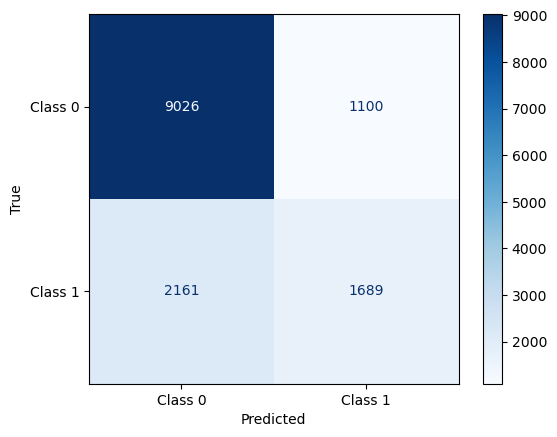

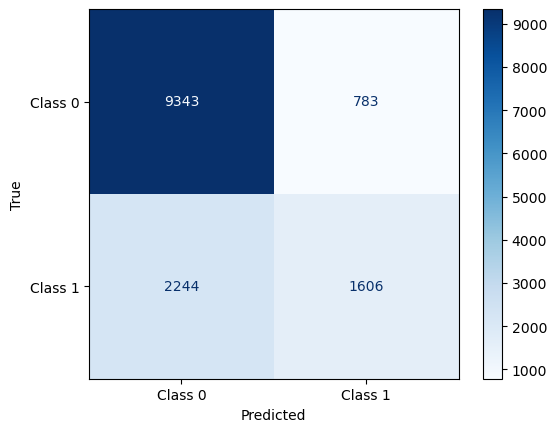

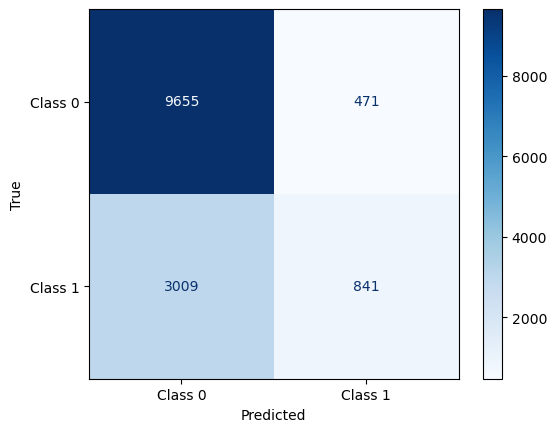

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_xgb = confusion_matrix(y_test_int, y_pred_xgb_int)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

#Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=['Class 0', 'Class 1'])
disp_rf.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#XGB
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=['Class 0', 'Class 1'])
disp_xgb.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Logistic Regression
disp_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=['Class 0', 'Class 1'])
disp_lr.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import pandas as pd

# Assuming y_test, y_pred_rf, y_pred_xgb_int, and y_pred_lr are defined elsewhere
# Also assuming the original test features are in X_test and X_test_int (if different for XGB)

# Convert y_test and predictions to DataFrame for easier manipulation
results_rf = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred_rf
})
results_xgb = pd.DataFrame({
    'True Label': y_test_int,  # Assuming y_test_int is used for XGB
    'Predicted Label': y_pred_xgb_int
})
results_lr = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred_lr
})

# Identify correctly and incorrectly classified instances for Random Forest
correct_rf = results_rf[results_rf['True Label'] == results_rf['Predicted Label']]
incorrect_rf = results_rf[results_rf['True Label'] != results_rf['Predicted Label']]

# Identify correctly and incorrectly classified instances for XGB
correct_xgb = results_xgb[results_xgb['True Label'] == results_xgb['Predicted Label']]
incorrect_xgb = results_xgb[results_xgb['True Label'] != results_xgb['Predicted Label']]

# Identify correctly and incorrectly classified instances for Logistic Regression
correct_lr = results_lr[results_lr['True Label'] == results_lr['Predicted Label']]
incorrect_lr = results_lr[results_lr['True Label'] != results_lr['Predicted Label']]

# Count the number of correct and incorrect classifications for each class
def count_classes(df):
    class_counts = df['True Label'].value_counts().sort_index()
    return class_counts.get(0, 0), class_counts.get(1, 0)

correct_rf_0, correct_rf_1 = count_classes(correct_rf)
incorrect_rf_0, incorrect_rf_1 = count_classes(incorrect_rf)

correct_xgb_0, correct_xgb_1 = count_classes(correct_xgb)
incorrect_xgb_0, incorrect_xgb_1 = count_classes(incorrect_xgb)

correct_lr_0, correct_lr_1 = count_classes(correct_lr)
incorrect_lr_0, incorrect_lr_1 = count_classes(incorrect_lr)

# Print the results
print("Random Forest - Correctly Classified Instances: Class 0:", correct_rf_0, "Class 1:", correct_rf_1)
print("Random Forest - Incorrectly Classified Instances: Class 0:", incorrect_rf_0, "Class 1:", incorrect_rf_1)

print("XGB - Correctly Classified Instances: Class 0:", correct_xgb_0, "Class 1:", correct_xgb_1)
print("XGB - Incorrectly Classified Instances: Class 0:", incorrect_xgb_0, "Class 1:", incorrect_xgb_1)

print("Logistic Regression - Correctly Classified Instances: Class 0:", correct_lr_0, "Class 1:", correct_lr_1)
print("Logistic Regression - Incorrectly Classified Instances: Class 0:", incorrect_lr_0, "Class 1:", incorrect_lr_1)


Random Forest - Correctly Classified Instances: Class 0: 9026 Class 1: 1689
Random Forest - Incorrectly Classified Instances: Class 0: 1100 Class 1: 2161
XGB - Correctly Classified Instances: Class 0: 9343 Class 1: 1606
XGB - Incorrectly Classified Instances: Class 0: 783 Class 1: 2244
Logistic Regression - Correctly Classified Instances: Class 0: 9655 Class 1: 841
Logistic Regression - Incorrectly Classified Instances: Class 0: 471 Class 1: 3009


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


<h2>Error Analysis</h2>

<h3>Logistic Regression</h3>

<h4>Confusion Matrix</h4>

Confusion Matrix:
[[9272  854]
 [2205 1645]]


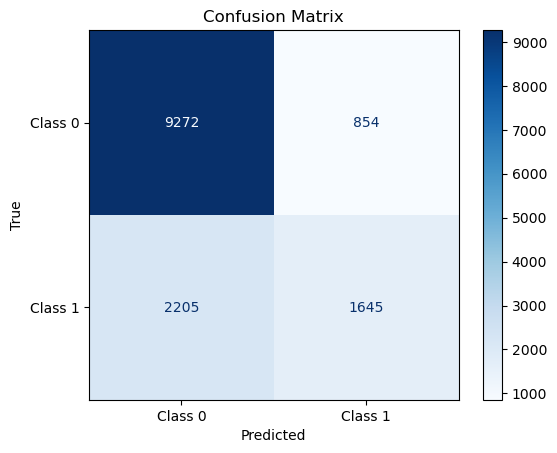

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_lr = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_lr)

import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


<h4>Error Types</h4>

In [ ]:
false_positives = conf_matrix_lr[0][1]
false_negatives = conf_matrix_lr[1][0]
print("\nFalse Positives:", false_positives)
print("False Negatives:", false_negatives)


False Positives: 471
False Negatives: 3009


<h4>Misclassified Samples</h4>

In [ ]:
misclassified_idx_lr = np.where(y_test != y_pred)[0]

for idx in misclassified_idx_lr[:5]:
    print(f"True label: {y_test.iloc[idx]}, Predicted label: {y_pred[idx]}")
    print("Features:")
    print(X_test.iloc[idx])
    print("-------------------------")

True label: 0, Predicted label: 1
Features:
lead_time                         1.131163
arrival_date_year                 1.152019
stays_in_weekend_nights          -0.973501
stays_in_week_nights              0.662154
adults                            0.193586
children                         -0.304531
babies                           -0.098787
previous_cancellations           -0.084928
previous_bookings_not_canceled   -0.105581
booking_changes                  -0.371058
days_in_waiting_list             -0.074710
adr                               0.274757
required_car_parking_spaces      -0.300011
total_of_special_requests        -0.840621
Name: 61086, dtype: float64
-------------------------
True label: 0, Predicted label: 1
Features:
lead_time                         0.188331
arrival_date_year                 1.152019
stays_in_weekend_nights           0.958626
stays_in_week_nights             -0.305724
adults                            0.193586
children                         -0.30453

<h3>Random Forest</h3>

<h4>Confusion Matrix</h4>

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=['Class 0', 'Class 1'])
disp_rf.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<h4>Error Types</h4>

In [ ]:
false_positives = conf_matrix_rf[0][1]
false_negatives = conf_matrix_rf[1][0]
print("\nFalse Positives:", false_positives)
print("False Negatives:", false_negatives)


False Positives: 1100
False Negatives: 2161


<h4>Misclassified Samples</h4>

In [ ]:
misclassified_idx_rf = [idx for idx, (true, pred) in enumerate(zip(y_test, y_pred_rf)) if true != pred]

for idx in misclassified_idx_rf[:5]:
    print(f"True label: {y_test.iloc[idx]}, Predicted label: {y_pred_rf[idx]}")
    print("Features:")
    print(X_test.iloc[idx])
    print("-------------------------")

True label: 1, Predicted label: 0
Features:
lead_time                        -0.091027
arrival_date_year                 1.152019
stays_in_weekend_nights          -0.973501
stays_in_week_nights             -0.305724
adults                           -1.370323
children                         -0.304531
babies                           -0.098787
previous_cancellations           -0.084928
previous_bookings_not_canceled   -0.105581
booking_changes                  -0.371058
days_in_waiting_list             -0.074710
adr                               0.673784
required_car_parking_spaces      -0.300011
total_of_special_requests        -0.840621
Name: 34532, dtype: float64
-------------------------
True label: 0, Predicted label: 1
Features:
lead_time                         1.131163
arrival_date_year                 1.152019
stays_in_weekend_nights          -0.973501
stays_in_week_nights              0.662154
adults                            0.193586
children                         -0.30453

<h3>XGB</h3>

<h4>Confusion Matrix</h4>

In [ ]:
conf_matrix_xgb = confusion_matrix(y_test_int, y_pred_xgb_int)
print("Confusion Matrix:")
print(conf_matrix_xgb)

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=['Class 0', 'Class 1'])
disp_xgb.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<h4>Error Types</h4>

In [ ]:
false_positives = conf_matrix_xgb[0][1]
false_negatives = conf_matrix_xgb[1][0]
print("\nFalse Positives:", false_positives)
print("False Negatives:", false_negatives)


False Positives: 783
False Negatives: 2244


<h4>Misclassified Samples</h4>

In [ ]:
misclassified_idx_xgb = [idx for idx, (true, pred) in enumerate(zip(y_test, y_pred_xgb)) if true != pred]

for idx in misclassified_idx_xgb[:5]:
    print(f"True label: {y_test.iloc[idx]}, Predicted label: {y_pred_xgb[idx]}")
    print("Features:")
    print(X_test.iloc[idx])
    print("-------------------------")

True label: 0, Predicted label: 0
Features:
lead_time                        -0.905820
arrival_date_year                 1.152019
stays_in_weekend_nights          -0.973501
stays_in_week_nights              0.178215
adults                            0.193586
children                         -0.304531
babies                           -0.098787
previous_cancellations           -0.084928
previous_bookings_not_canceled   -0.105581
booking_changes                  -0.371058
days_in_waiting_list             -0.074710
adr                              -0.375030
required_car_parking_spaces      -0.300011
total_of_special_requests         0.362825
Name: 50432, dtype: float64
-------------------------
True label: 1, Predicted label: 1
Features:
lead_time                        -0.091027
arrival_date_year                 1.152019
stays_in_weekend_nights          -0.973501
stays_in_week_nights             -0.305724
adults                           -1.370323
children                         -0.30453

<h3>t-SNE</h3>

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test)

plt.figure(figsize=(10, 8))
plt.scatter(X_test_tsne[y_test=='0', 0], X_test_tsne[y_test=='0', 1], c='blue', label='True: 0')
plt.scatter(X_test_tsne[y_test=='1', 0], X_test_tsne[y_test=='1', 1], c='red', label='True: 1')
plt.scatter(X_test_tsne[y_pred=='0', 0], X_test_tsne[y_pred=='0', 1], c='lightblue', marker='x', label='Predicted: 0')
plt.scatter(X_test_tsne[y_pred=='1', 0], X_test_tsne[y_pred=='1', 1], c='pink', marker='x', label='Predicted: 1')
plt.legend()
plt.show()

<h4>Perplexity = 10</h4>

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
X_test_tsne = tsne.fit_transform(X_test)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test_tsne[y_test=='0', 0], X_test_tsne[y_test=='0', 1], c='blue', marker='+', label='True: 0')
plt.scatter(X_test_tsne[y_test=='1', 0], X_test_tsne[y_test=='1', 1], c='red', marker='x', label='True: 1')
#plt.title('True Labels')
plt.legend()

#plt.subplot(1, 2, 2)
#plt.scatter(X_test_tsne[y_pred=='0', 0], X_test_tsne[y_pred=='0', 1], c='lightblue', marker='+', label='Predicted: 0')
#plt.scatter(X_test_tsne[y_pred=='1', 0], X_test_tsne[y_pred=='1', 1], c='pink', marker='x', label='Predicted: 1')
#plt.title('Predicted Labels')

plt.show()

<h4>Perplexity = 50</h4>

In [ ]:
tsne1 = TSNE(n_components=2, random_state=42, perplexity=50)
X_test_tsne1 = tsne1.fit_transform(X_test)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test_tsne1[y_test=='0', 0], X_test_tsne1[y_test=='0', 1], c='blue', marker='+', label='True: 0')
plt.scatter(X_test_tsne1[y_test=='1', 0], X_test_tsne1[y_test=='1', 1], c='red', marker='x', label='True: 1')
#plt.title('True Labels')
plt.legend()

#plt.subplot(1, 2, 2)
#plt.scatter(X_test_tsne1[y_pred=='0', 0], X_test_tsne1[y_pred=='0', 1], c='lightblue', marker='+', label='Predicted: 0')
#plt.scatter(X_test_tsne1[y_pred=='1', 0], X_test_tsne1[y_pred=='1', 1], c='pink', marker='x', label='Predicted: 1')
#plt.title('Predicted Labels')

plt.show()

<h4>Perplexity = 100</h4>

In [ ]:
tsne2 = TSNE(n_components=2, random_state=42, perplexity=100)
X_test_tsne2 = tsne2.fit_transform(X_test)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test_tsne2[y_test=='0', 0], X_test_tsne2[y_test=='0', 1], c='blue', marker='+', label='True: 0')
plt.scatter(X_test_tsne2[y_test=='1', 0], X_test_tsne2[y_test=='1', 1], c='red', marker='x', label='True: 1')
#plt.title('True Labels')
plt.legend()

#plt.subplot(1, 2, 2)
#plt.scatter(X_test_tsne2[y_pred=='0', 0], X_test_tsne2[y_pred=='0', 1], c='lightblue', marker='+', label='Predicted: 0')
#plt.scatter(X_test_tsne2[y_pred=='1', 0], X_test_tsne2[y_pred=='1', 1], c='pink', marker='x', label='Predicted: 1')
#plt.title('Predicted Labels')
#plt.legend()

plt.show()

<h4>Perplexity = 150</h4>

In [ ]:
tsne3 = TSNE(n_components=2, random_state=42, perplexity=150)
X_test_tsne3 = tsne3.fit_transform(X_test)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test_tsne3[y_test=='0', 0], X_test_tsne3[y_test=='0', 1], c='blue', marker='+', label='True: 0')
plt.scatter(X_test_tsne3[y_test=='1', 0], X_test_tsne3[y_test=='1', 1], c='red', marker='x', label='True: 1')
#plt.title('True Labels')
plt.legend()

#plt.subplot(1, 2, 2)
#plt.scatter(X_test_tsne3[y_pred=='0', 0], X_test_tsne3[y_pred=='0', 1], c='lightblue', marker='+', label='Predicted: 0')
#plt.scatter(X_test_tsne3[y_pred=='1', 0], X_test_tsne3[y_pred=='1', 1], c='pink', marker='x', label='Predicted: 1')
#plt.title('Predicted Labels')
#plt.legend()

plt.show()

In [ ]:
import pandas as pd

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Skewness
skewness = numeric_df.skew()

# Kurtosis
kurtosis = numeric_df.kurtosis()

# Combine skewness and kurtosis into one DataFrame
skew_kurt_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

print(skew_kurt_df)


In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis

numeric_columns = df.select_dtypes(include=[np.number])
print(skew(numeric_columns, axis=0, bias=True))
print(kurtosis(numeric_columns, axis=0, bias=True))

In [ ]:
 import warnings
import numpy as np
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress the warning
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")

# Convert infinite values to NaN
numeric_columns.replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculate skewness and kurtosis
skewness = skew(numeric_columns, axis=0, bias=True)
kurt = kurtosis(numeric_columns, axis=0, bias=True)

# Remove NaN values
skewness = skewness[~np.isnan(skewness)]
kurt = kurt[~np.isnan(kurt)]

# Calculate mean, median, and mode
mean_skew = np.mean(skewness)
median_skew = np.median(skewness)
mode_skew = mode(skewness)[0]

mean_kurt = np.mean(kurt)
median_kurt = np.median(kurt)
mode_kurt = mode(kurt)[0]

# KDE plot for skewness
plt.figure(figsize=(10, 6))
sns.kdeplot(skewness, color='blue', label='Skewness')
plt.axvline(mean_skew, color='green', linestyle='--', label='Mean')
plt.axvline(median_skew, color='orange', linestyle='--', label='Median')
plt.axvline(mode_skew, color='red', linestyle='--', label='Mode')
plt.legend()
plt.show()

# KDE plot for kurtosis
plt.figure(figsize=(10, 6))
sns.kdeplot(kurt, color='red', label='Kurtosis')
plt.axvline(mean_kurt, color='green', linestyle='--', label='Mean')
plt.axvline(median_kurt, color='orange', linestyle='--', label='Median')
plt.axvline(mode_kurt, color='blue', linestyle='--', label='Mode')
plt.legend()
plt.show()
